<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


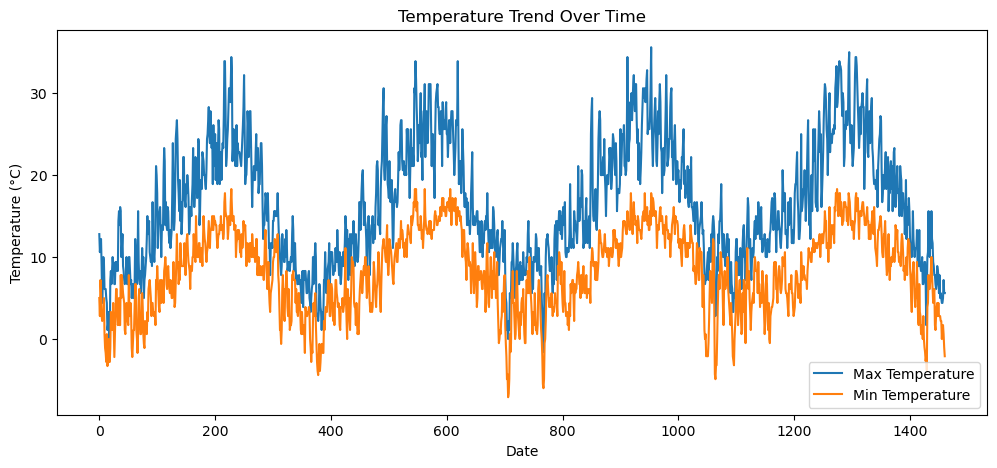

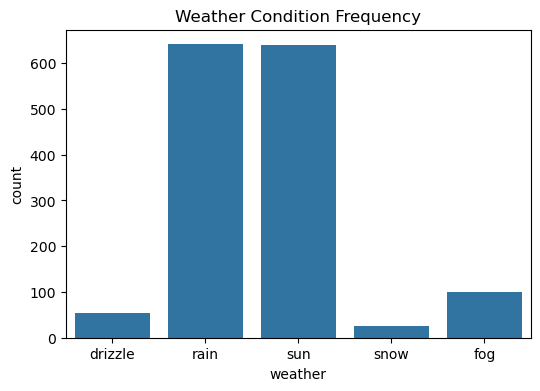

Accuracy: 0.9385665529010239
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       168
           1       0.99      0.86      0.92       125

    accuracy                           0.94       293
   macro avg       0.95      0.93      0.94       293
weighted avg       0.94      0.94      0.94       293



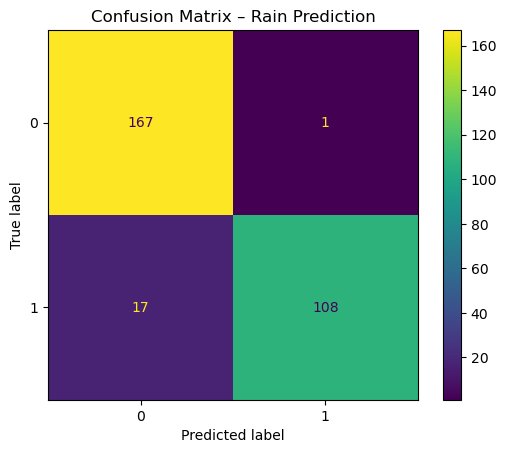

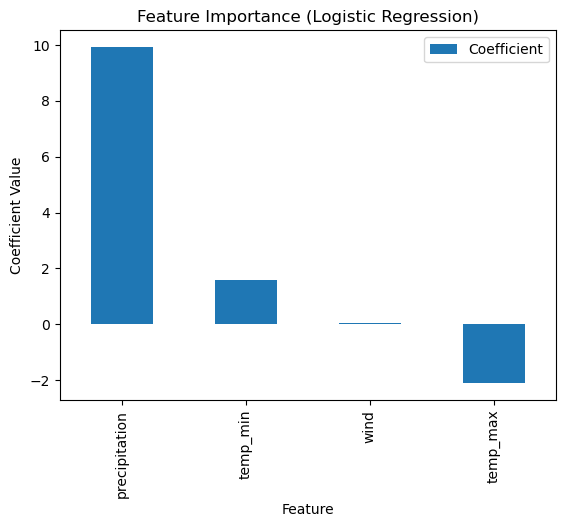

[0]
Prediction: No Rain
Prediction: No Rain


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib


df = pd.read_csv("data/seattle-weather.csv")
df.head()
df.info()
df.describe()
plt.figure(figsize=(12,5))
plt.plot(df.index, df['temp_max'], label='Max Temperature')
plt.plot(df.index, df['temp_min'], label='Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()
df['weather'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='weather', data=df)
plt.title('Weather Condition Frequency')
plt.show()
df['rain'] = df['precipitation'].apply(lambda x: 1 if x > 0 else 0)
df['rain'].value_counts()
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['rain']



#train test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#logistic regression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#train logistic regression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


# model evaluation

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



# confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix – Rain Prediction")
plt.show()



feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance

feature_importance.set_index('Feature').plot(kind='bar')
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.show()


# Save the trained Logistic Regression model to a file
# This allows us to reuse the model later without retraining
joblib.dump(model, "rain_prediction_model.pkl")

# Save the fitted scaler used for feature normalization
# The same scaler must be used during prediction on new data
joblib.dump(scaler, "scaler.pkl")





loaded_model = joblib.load("rain_prediction_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

sample = X_test.iloc[:1]
sample_scaled = loaded_scaler.transform(sample)

loaded_model.predict(sample_scaled)

prediction = loaded_model.predict(sample_scaled)
print(prediction)
if prediction[0] == 1:
    print("Prediction: Rain")
else:
    print("Prediction: No Rain")






# TEST WITH MULTIPLE SAMPLES

sample_batch = X_test.iloc[:5]
sample_batch_scaled = loaded_scaler.transform(sample_batch)

predictions = loaded_model.predict(sample_batch_scaled)
predictions





# TEST WITH CUSTOM INPUT

new_weather = pd.DataFrame(
    [[0.0, 18.5, 10.2, 3.1]],
    columns=['precipitation', 'temp_max', 'temp_min', 'wind']
)

new_weather_scaled = loaded_scaler.transform(new_weather)
prediction = loaded_model.predict(new_weather_scaled)

print("Prediction:", "Rain" if prediction[0] == 1 else "No Rain")







